## Model Machine Learning for PCOS Project

### NOTE

#### -  Hubungkan ke database (MySQL)

### Data Preparation

1. Import Tools

In [1]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns

2. Import File Dataset

In [2]:
data = pd.read_csv('PCOS_data_cleaned.csv')
data.head()

,Unnamed: 0,sl. no,patient file no.,pcos (y/n),age (yrs),weight (kg),height(cm),blood group,pulse rate(bpm),rr (breaths/min),...,reg.exercise(y/n),bp _systolic (mmhg),bp _diastolic (mmhg),follicle no. (l),follicle no. (r),avg. f size (l) (mm),avg. f size (r) (mm),endometrium (mm),unnamed: 44,BMI
0,0,1,1,0,28,44.6,152.0,15,78,22,...,0,110,80,3,3,18.0,18.0,8.5,NaN,19.304017
1,1,2,2,0,36,65.0,161.5,15,74,20,...,0,120,70,3,5,15.0,14.0,3.7,NaN,24.921163
2,2,3,3,1,33,68.8,165.0,11,72,18,...,0,120,80,13,15,18.0,20.0,10.0,NaN,25.270891
3,3,4,4,0,37,65.0,148.0,13,72,20,...,0,120,70,2,2,15.0,14.0,7.5,NaN,29.674945
4,4,5,5,0,25,52.0,161.0,11,72,18,...,0,120,80,3,4,16.0,14.0,7.0,NaN,20.060954


3. Import dataset ke MongoDB

In [37]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["PCOS"]
collection = db["PCOS_data"]

In [38]:
data_dict = data.to_dict("records")
collection.insert_many(data_dict)
print(f"Inserted {len(data_dict)} records into MongoDB.")

Inserted 528 records into MongoDB.


3. Drop kolom ID

In [39]:
if '_id' in data.columns:
    data.drop('_id', axis=1, inplace=True)

data.head()

,pcos (y/n),age (yrs),weight (kg),height(cm),cycle(r/i),hip(inch),waist(inch),weight gain(y/n),hair growth(y/n),darkening skin folds (y/n),hair loss(y/n),pimples(y/n),fast food (y/n),BMI
0,0,28,44.6,152.0,0,91.44,76.20,0,0,0,0,0,1.0,19.0
1,0,36,65.0,161.5,0,96.52,81.28,0,0,0,0,0,0.0,25.0
2,1,33,68.8,165.0,0,101.60,91.44,0,0,0,1,1,1.0,25.0
3,0,37,65.0,148.0,0,106.68,91.44,0,0,0,0,0,0.0,30.0
4,0,25,52.0,161.0,0,93.98,76.20,0,0,0,1,0,0.0,20.0


### Data Understanding 

1. Melihat Isi Data

In [55]:
# Shape
print("Jumlah baris dan kolom:", data.shape)

# Tipe data per kolom
print("\nTipe data:")
print(data.dtypes)

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(data.describe(include='all'))

# Cek missing values
print("\nMissing values:")
print(data.isnull().sum())

# Cek duplikasi
print("\nJumlah duplikat:", data.duplicated().sum())

Jumlah baris dan kolom: (518, 14)

Tipe data:
pcos (y/n)                      int64
age (yrs)                       int64
weight (kg)                   float64
height(cm)                    float64
cycle(r/i)                      int64
hip(inch)                     float64
waist(inch)                   float64
weight gain(y/n)                int64
hair growth(y/n)                int64
darkening skin folds (y/n)      int64
hair loss(y/n)                  int64
pimples(y/n)                    int64
fast food (y/n)               float64
BMI                           float64
dtype: object

Statistik deskriptif:
       pcos (y/n)   age (yrs)  weight (kg)  height(cm)  cycle(r/i)  \
count  518.000000  518.000000   518.000000  518.000000       518.0   
mean     0.318533   31.361004    59.343436  156.505699         0.0   
std      0.466358    5.327839     9.591844    6.043297         0.0   
min      0.000000   20.000000    35.000000  140.000000         0.0   
25%      0.000000   28.000000    52

2. Cek Missing Values

In [56]:
print(f"Dimensi Data: {data.shape}")
print("\nData Tampil:")
print(data.isnull().sum().sort_values(ascending=False).head(20))

Dimensi Data: (518, 14)

Data Tampil:
pcos (y/n)                    0
age (yrs)                     0
weight (kg)                   0
height(cm)                    0
cycle(r/i)                    0
hip(inch)                     0
waist(inch)                   0
weight gain(y/n)              0
hair growth(y/n)              0
darkening skin folds (y/n)    0
hair loss(y/n)                0
pimples(y/n)                  0
fast food (y/n)               0
BMI                           0
dtype: int64


###  Data Cleaning

1. Drop Kolom

In [42]:
columns_to_drop = ['bp _systolic (mmhg)','bp _diastolic (mmhg)','follicle no. (l)','follicle no. (r)','avg. f size (l) (mm)','avg. f size (r) (mm)','endometrium (mm)','unnamed: 44','waist:hip ratio','tsh (miu/l)','amh(ng/ml)','prl(ng/ml)','vit d3 (ng/ml)','prg(ng/ml)','rbs(mg/dl)','hb(g/dl)','Unnamed: 0','sl. no','patient file no.','i   beta-hcg(miu/ml)','ii    beta-hcg(miu/ml)','fsh(miu/ml)','lh(miu/ml)','fsh/lh','rr (breaths/min)']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

KeyError: "['bp _systolic (mmhg)', 'bp _diastolic (mmhg)', 'follicle no. (l)', 'follicle no. (r)', 'avg. f size (l) (mm)', 'avg. f size (r) (mm)', 'endometrium (mm)', 'unnamed: 44', 'waist:hip ratio', 'tsh (miu/l)', 'amh(ng/ml)', 'prl(ng/ml)', 'vit d3 (ng/ml)', 'prg(ng/ml)', 'rbs(mg/dl)', 'hb(g/dl)', 'Unnamed: 0', 'sl. no', 'patient file no.', 'i   beta-hcg(miu/ml)', 'ii    beta-hcg(miu/ml)', 'fsh(miu/ml)', 'lh(miu/ml)', 'fsh/lh', 'rr (breaths/min)'] not found in axis"

In [7]:
columns_to_drop = ['blood group','pulse rate(bpm)','cycle length(days)','marraige status (yrs)','pregnant(y/n)','no. of aborptions','reg.exercise(y/n)']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [43]:
data.head()

,pcos (y/n),age (yrs),weight (kg),height(cm),cycle(r/i),hip(inch),waist(inch),weight gain(y/n),hair growth(y/n),darkening skin folds (y/n),hair loss(y/n),pimples(y/n),fast food (y/n),BMI
0,0,28,44.6,152.0,0,91.44,76.20,0,0,0,0,0,1.0,19.0
1,0,36,65.0,161.5,0,96.52,81.28,0,0,0,0,0,0.0,25.0
2,1,33,68.8,165.0,0,101.60,91.44,0,0,0,1,1,1.0,25.0
3,0,37,65.0,148.0,0,106.68,91.44,0,0,0,0,0,0.0,30.0
4,0,25,52.0,161.0,0,93.98,76.20,0,0,0,1,0,0.0,20.0


2. Tangani Missing Values

In [57]:
data["fast food (y/n)"].fillna(data["fast food (y/n)"].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8900\1617597656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["fast food (y/n)"].fillna(data["fast food (y/n)"].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8900\1617597656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["fast food (y/n)"].fillna(data["fast food (

In [45]:
data.isnull().sum()

pcos (y/n)                    0
age (yrs)                     0
weight (kg)                   0
height(cm)                    0
cycle(r/i)                    0
hip(inch)                     0
waist(inch)                   0
weight gain(y/n)              0
hair growth(y/n)              0
darkening skin folds (y/n)    0
hair loss(y/n)                0
pimples(y/n)                  0
fast food (y/n)               0
BMI                           0
dtype: int64

3. Tangani Outliers

In [46]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Deteksi outlier pada kolom Fare
outliers = data[(data['BMI'] < (Q1 - 1.5 * IQR)) | (data['BMI'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outlier BMI: {len(outliers)}")

# Hapus outlier (opsional)
data = data[~((data['BMI'] < (Q1 - 1.5 * IQR)) | (data['BMI'] > (Q3 + 1.5 * IQR)))]

Jumlah outlier BMI: 10


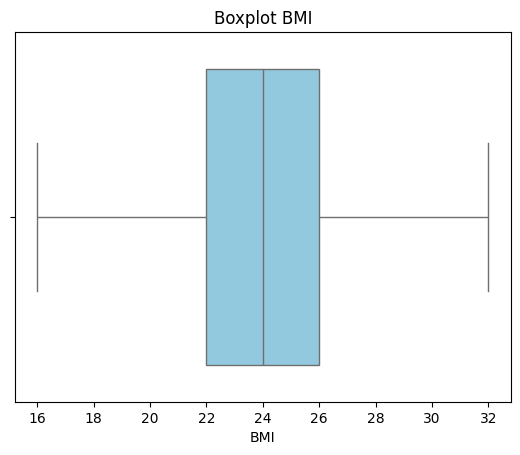

In [47]:
sns.boxplot(x=data['BMI'], color='skyblue')
plt.title('Boxplot BMI')
plt.show()

4. Normalisasi  Kolom

In [60]:
data['cycle(r/i)'] = data['cycle(r/i)'].map({1: 4, 0: 2})

print(data)

     pcos (y/n)  age (yrs)  weight (kg)  height(cm)  cycle(r/i)  hip(inch)  \
0             0         28         44.6     152.000           2      91.44   
1             0         36         65.0     161.500           2      96.52   
2             1         33         68.8     165.000           2     101.60   
3             0         37         65.0     148.000           2     106.68   
4             0         25         52.0     161.000           2      93.98   
..          ...        ...          ...         ...         ...        ...   
536           0         35         50.0     164.592           2      71.12   
537           0         30         63.2     158.000           2      86.36   
538           0         36         54.0     152.000           2      76.20   
539           0         27         50.0     150.000           2      71.12   
540           1         23         82.0     165.000           2     121.92   

     waist(inch)  weight gain(y/n)  hair growth(y/n)  \
0      

C:\Users\hp\AppData\Local\Temp\ipykernel_8900\3366539729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cycle(r/i)'] = data['cycle(r/i)'].map({1: 4, 0: 2})


In [13]:
data['hip(inch)'] = data['hip(inch)'] * 2.54

In [14]:
data['waist(inch)'] = data['waist(inch)'] * 2.54

In [62]:
data.head()

,pcos (y/n),age (yrs),weight (kg),height(cm),cycle(r/i),hip(inch),waist(inch),weight gain(y/n),hair growth(y/n),darkening skin folds (y/n),hair loss(y/n),pimples(y/n),fast food (y/n),BMI
0,0,28,44.6,152.0,2,91.44,76.20,0,0,0,0,0,1.0,19.0
1,0,36,65.0,161.5,2,96.52,81.28,0,0,0,0,0,0.0,25.0
2,1,33,68.8,165.0,2,101.60,91.44,0,0,0,1,1,1.0,25.0
3,0,37,65.0,148.0,2,106.68,91.44,0,0,0,0,0,0.0,30.0
4,0,25,52.0,161.0,2,93.98,76.20,0,0,0,1,0,0.0,20.0


In [16]:
data['BMI'] = data['BMI'].round()


In [53]:
data['cycle(r/i)'] = data['cycle(r/i)'].fillna(0).astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_8900\2637006290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cycle(r/i)'] = data['cycle(r/i)'].fillna(0).astype(int)


In [33]:
data['cycle(r/i)'] = data['cycle(r/i)'].astype(int)


In [35]:
data.rename(columns={'skin darkening (y/n)':'darkening skin folds (y/n)'}, inplace=True)

In [63]:
print(data.isna().sum())


pcos (y/n)                    0
age (yrs)                     0
weight (kg)                   0
height(cm)                    0
cycle(r/i)                    0
hip(inch)                     0
waist(inch)                   0
weight gain(y/n)              0
hair growth(y/n)              0
darkening skin folds (y/n)    0
hair loss(y/n)                0
pimples(y/n)                  0
fast food (y/n)               0
BMI                           0
dtype: int64


#### Visualisasi Menggunakan Heatmap

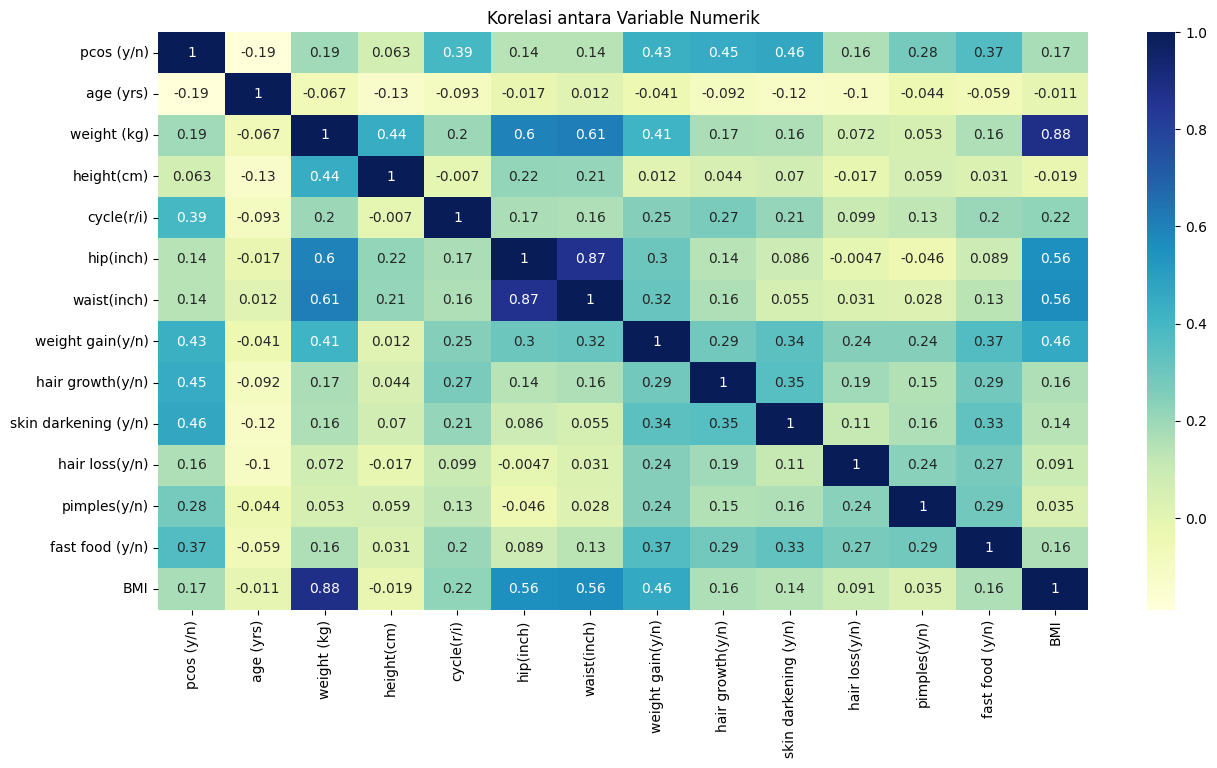

In [17]:
plt.figure(figsize=(15, 7.5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Korelasi antara Variable Numerik')
plt.show()

### Model Selection

1. Import Tools dan Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

2. Membagi Data

In [65]:
X = data.drop('pcos (y/n)', axis=1)
y = data['pcos (y/n)']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Melatih Model SVM 

In [67]:
print(X_train.isna().sum())  # lihat jumlah NaN per kolom


age (yrs)                     0
weight (kg)                   0
height(cm)                    0
cycle(r/i)                    0
hip(inch)                     0
waist(inch)                   0
weight gain(y/n)              0
hair growth(y/n)              0
darkening skin folds (y/n)    0
hair loss(y/n)                0
pimples(y/n)                  0
fast food (y/n)               0
BMI                           0
dtype: int64


In [68]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear')  # kernel bisa 'linear', 'poly', 'rbf', 'sigmoid'

# Latih model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

4.  Tes Akurasi Model menggunakan Confussion Matrix

Akurasi: 81.73%
[[66  9]
 [10 19]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        75
           1       0.68      0.66      0.67        29

    accuracy                           0.82       104
   macro avg       0.77      0.77      0.77       104
weighted avg       0.82      0.82      0.82       104



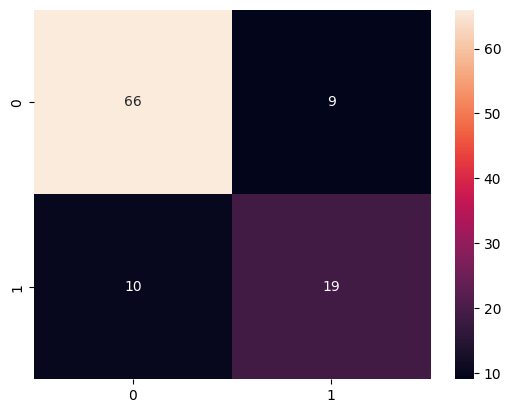

In [69]:
# Prediksi data uji
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Import Model 

In [70]:
joblib.dump(svm_model, 'PCOS-Model.pkl')

['PCOS-Model.pkl']

### Test Prediksi / Klasifikasi

In [71]:
print(list(X.columns))

['age (yrs)', 'weight (kg)', 'height(cm)', 'cycle(r/i)', 'hip(inch)', 'waist(inch)', 'weight gain(y/n)', 'hair growth(y/n)', 'darkening skin folds (y/n)', 'hair loss(y/n)', 'pimples(y/n)', 'fast food (y/n)', 'BMI']


In [72]:
load_model = joblib.load('SVM-Model.pkl')

In [73]:
# ['age (yrs)', 'weight (kg)', 'height(cm)', 'cycle(r/i)', 'hip(inch)', 'waist(inch)', 'weight gain(y/n)', 'hair growth(y/n)', 'skin darkening (y/n)', 'hair loss(y/n)', 'pimples(y/n)', 'fast food (y/n)', 'BMI']

predictionsA = load_model.predict(np.array([[33, 68.8, 160.0, 4, 112, 60, 0, 0, 0, 0, 0, 1.0, 25.27]])) #harusnya ini pcos
predictionsB = load_model.predict(np.array([[28, 44.6, 152.0, 2, 90, 50, 0, 0, 0, 0, 0, 1.0, 19.30]])) #harusnya ini tidak pcos

def lakukan_prediksi(predictions):
    if predictions[0] == 0:
        print("Hasil Data tidak Menderita PCOS")
    elif predictions[0] == 1:
        print("Hasil data menunjukkan Menderita PCOS")

lakukan_prediksi(predictionsA)
lakukan_prediksi(predictionsB)

Hasil data menunjukkan Menderita PCOS
Hasil Data tidak Menderita PCOS


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
